In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
def scale_and_pca(path, file_name, output_path):
    print("LOADING")
    df = pd.read_csv(path + file_name + ".csv")

    print("X-Y SPLIT")
    X_df = df.drop(["pic_path", "rank", "pic_name"], axis=1)
    y_df = df[["pic_path", "rank", "pic_name"]]

    print("SCALING")
    scaler_standard = StandardScaler()
    X_scaled = scaler_standard.fit_transform(X_df)

    print("PCA")
    pca_comp = 100
    pca = PCA(n_components=pca_comp)
    X_pca = pca.fit_transform(X_scaled)

    print("PCA TO PD DF")
    initial = file_name[-1]
    pca_col = [initial + str(n) for n in range(pca_comp)]
    X_pca_df = pd.DataFrame(X_pca, columns=pca_col)

    print("MERGING")
    merged_df = y_df.join(X_pca_df)
    print("SAVING")
    merged_df.to_csv(output_path + file_name + "pca.csv")

In [3]:
df_S = pd.read_csv("data/interim/features_CVN_S_pca.csv")
df_C = pd.read_csv("data/interim/features_CVN_C_pca.csv")

df = df_S.merge(df_C, on=["pic_path", "rank", "pic_name"], how="inner")

In [4]:
print("X-Y SPLIT")
X_df = df.drop(["pic_path", "rank", "pic_name"], axis=1)
y_df = df[["pic_path", "rank", "pic_name"]]

print("SCALING")
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X_df)

X-Y SPLIT
SCALING


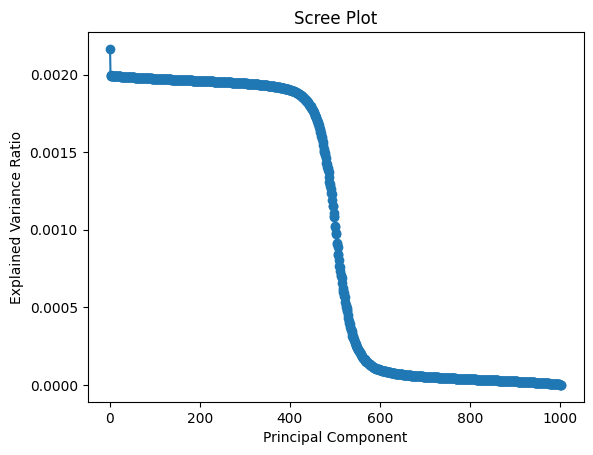

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Perform PCA on your dataset and obtain the explained variance ratio
# pca.fit(X)  # X is your dataset
pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)
explained_var_ratio = pca.explained_variance_ratio_

# Compute the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Create a scree plot
component_number = np.arange(1, len(explained_var_ratio) + 1)

plt.plot(component_number, explained_var_ratio, marker="o")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [6]:
# Create a new DataFrame with only the numerical columns
import numpy as np

# Perform PCA


# Calculate the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the cumulative explained variance ratio for each number of components
for n, ratio in enumerate(cumulative_explained_variance_ratio, 1):
    print(f"Number of Components: {n}, Cumulative Explained Variance Ratio: {ratio}")

Number of Components: 1, Cumulative Explained Variance Ratio: 0.002165085402573391
Number of Components: 2, Cumulative Explained Variance Ratio: 0.004159350952264153
Number of Components: 3, Cumulative Explained Variance Ratio: 0.006153127005849991
Number of Components: 4, Cumulative Explained Variance Ratio: 0.008146429822903083
Number of Components: 5, Cumulative Explained Variance Ratio: 0.010139286051887776
Number of Components: 6, Cumulative Explained Variance Ratio: 0.012131700672411639
Number of Components: 7, Cumulative Explained Variance Ratio: 0.014123894512543068
Number of Components: 8, Cumulative Explained Variance Ratio: 0.016115702904480483
Number of Components: 9, Cumulative Explained Variance Ratio: 0.018106892016546257
Number of Components: 10, Cumulative Explained Variance Ratio: 0.02009779070970889
Number of Components: 11, Cumulative Explained Variance Ratio: 0.022088480457622878
Number of Components: 12, Cumulative Explained Variance Ratio: 0.024078940843453387
Nu

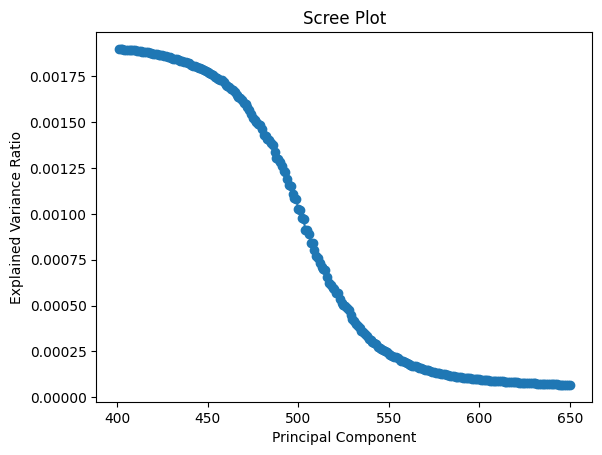

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Perform PCA on your dataset and obtain the explained variance ratio
# pca.fit(X)  # X is your dataset
pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)
explained_var_ratio = pca.explained_variance_ratio_

# Compute the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Create a scree plot
component_number = np.arange(1, len(explained_var_ratio) + 1)

plt.plot(component_number[400:650], explained_var_ratio[400:650], marker="o")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()